**This project consist of a Jupyter notebook that 1)Scrapes PokemonDB for the data of all pokemon thus far, 2)outputs the data to a CSV file, and 3) create data visualizations with said data.**

**1. Import everything we need.**

In [116]:
from requests import get #For creating response objects
from bs4 import BeautifulSoup #For creating beutifulsoup objects
import pandas as pd #For creating dataframes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import re
reload(sys)
sys.setdefaultencoding('utf-8')
%matplotlib inline

**2. Create a response object and check status of url. 200 = Connection is good.**

In [117]:
url = 'https://pokemondb.net/pokedex/all'
response = get(url)
response.status_code

200

**3. Create a bs4 soup object using BeautifulSoup, and passing in our response object + 'lxml' parser.**

In [118]:
soup = BeautifulSoup(response.content, 'lxml')
type(soup)

bs4.BeautifulSoup

**4. Create a rows variable to store all the table rows.<br>
If the website had multiple tables or other 'tr' classes, we would have to create a container to<br>
hold all the rows and then create a rows variable by using find_all on container. In this case,<br> 
there is only one table that holds all the 'tr' tags.**

In [119]:
rows = soup.find_all('tr')

**5. Create empty lists of each column, and itterate through the rows variable skipping the first one ([1:]) <br>
a) Set 'col' variable to all the 'td' tags contained in each row in rows.<br>
b) Set each column to its appropriate name, get the text, and then append it to the appropriate<br> 
empty list.<br>
6.Create a list for the average of all stats of each pokemon by converting the list of totals in<br> integers and dividing by 6.**

In [120]:
numbers = []
names = []
types = []
hps = []
attacks = []
defenses = []
sp_attks = []
sp_defs = []
speeds = []
totals = []
st_avgs = []

for row in rows[1:]:
    col = row.find_all('td')
    
    num = col[0].text
    numbers.append(num)
   
    name = col[1].text
    names.append(name)
    
    poke_type = col[2].text
    types.append(poke_type)
    
    hp = col[4].text
    hps.append(hp)
    
    attack = col[5].text
    attacks.append(attack)
    
    defense = col[6].text
    defenses.append(defense)
    
    spa = col[7].text
    sp_attks.append(spa)
    
    spd = col[8].text
    sp_defs.append(spd)
    
    speed = col[9].text
    speeds.append(speed)
    
    total = col[3].text
    totals.append(total)
    
    st_avg = int(col[3].text)/6
    st_avgs.append(st_avg)

**6. Create Pandas DataFrame using the lists of data scraped from website, by entering the lists into pandas as a dictionary.**

In [121]:
poke_df = pd.DataFrame({'NationalNo':numbers,
                        'Name':names,
                        'Type':types,
                        'HP':hps,
                        'Attack':attacks,
                        'Defense':defenses,
                        'Sp_Atk':sp_attks,
                        'Sp_Def':sp_defs,
                        'Speed':speeds,
                        'Total':totals, 
                        'Stat_Avg':st_avgs,
                       })

**7. Output the first five records with .head()**

In [122]:
poke_df.head()

,Attack,Defense,HP,Name,NationalNo,Sp_Atk,Sp_Def,Speed,Stat_Avg,Total,Type
0,49,49,45,Bulbasaur,001,65,65,45,53,318,Grass Poison
1,62,63,60,Ivysaur,002,80,80,60,67,405,Grass Poison
2,82,83,80,Venusaur,003,100,100,80,87,525,Grass Poison
3,100,123,80,Venusaur Mega Venusaur,003,122,120,80,104,625,Grass Poison
4,52,43,39,Charmander,004,60,50,65,51,309,Fire


**8. Output the first five records with .tail()**

In [123]:
poke_df.tail()

,Attack,Defense,HP,Name,NationalNo,Sp_Atk,Sp_Def,Speed,Stat_Avg,Total,Type
1023,130,115,92,Zacian Hero of Many Battles,888,80,115,138,111,670,Fairy
1024,130,145,92,Zamazenta Crowned Shield,889,80,145,128,120,720,Fighting Steel
1025,130,115,92,Zamazenta Hero of Many Battles,889,80,115,138,111,670,Fighting
1026,85,95,140,Eternatus,890,145,95,130,115,690,Poison Dragon
1027,115,250,255,Eternatus Eternamax,890,125,250,130,187,1125,Poison Dragon


**9. Columns seem out of place, so we reoder them.**
- Using df = df[['column0','column1','column2'....'etc']]

In [124]:
poke_df = poke_df[['NationalNo','Name','Type','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Total','Stat_Avg']]

In [125]:
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,Grass Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,Grass Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,Grass Poison,80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,Grass Poison,80,100,123,122,120,80,625,104
4,004,Charmander,Fire,39,52,43,60,50,65,309,51


**10. Split the primary and secondary types.**

In [126]:
def camelcase_split(string):
    split_string = re.sub('([a-z])([A-Z])', r'\1 \2', string).split()
    return split_string

In [127]:
poke_df['Type'] = poke_df.Type.apply(camelcase_split)

In [128]:
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,[Fire],39,52,43,60,50,65,309,51


**11. Create a function that takes an argument and checks if the length is equal to 1.<br>
If so, it adds a 'None' to the list values, so we have 2 elements in each list.**

In [129]:
def add_none(type_2):
    if len(type_2) == 1:
        type_2.append('None')
    return type_2 

In [130]:
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,[Fire],39,52,43,60,50,65,309,51


**12. Apply Function**

In [131]:
poke_df['Type'] = poke_df.Type.apply(add_none)
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",39,52,43,60,50,65,309,51


**13. We take the 'Type' column of DataFrame and set it equal to a variable. <br>
Then use a for loop to go through each row and add i[0] and i[1] to two seperate lists that we <br>
will use as new columns.**

In [132]:
type1_2 = poke_df['Type']
#split_cols
type_1 = []
type_2 = []
for i in type1_2:
    type_1.append(i[0])
    type_2.append(i[1])

**14. Insert the two new collumns.**

In [133]:
idx = 2
poke_df.insert(loc=idx,column='Type_1',value=type_1)
poke_df.insert(loc=idx,column='Type_2',value=type_2)

In [134]:
poke_df.head()

,NationalNo,Name,Type_2,Type_1,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,Poison,Grass,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,Poison,Grass,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,Poison,Grass,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,Poison,Grass,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,None,Fire,"[Fire, None]",39,52,43,60,50,65,309,51


**15. Final Reorder.**

In [135]:
poke_df = poke_df[['NationalNo','Name','Type','Type_1','Type_2','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Total','Stat_Avg']]
poke_df.head()

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",Grass,Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",Grass,Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",Grass,Poison,80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",Grass,Poison,80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",Fire,None,39,52,43,60,50,65,309,51


**Optional: Remove the origional 'Type' column.**

In [136]:
#poke_df.drop('Type', axis=1, inplace=True)

**16. Export as CSV. Use "encoding='utf-8" to remove the 'u' from the Type list.**

In [137]:
poke_df.to_csv('poke_data.csv', encoding='utf-8')

In [138]:
poke_df.head()

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",Grass,Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",Grass,Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",Grass,Poison,80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",Grass,Poison,80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",Fire,None,39,52,43,60,50,65,309,51


**17. How would the dataframe look if ordered by total stats, greatest to least?**

In [139]:
poke_df.sort_values('Total', ascending=False)

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
458,384,Rayquaza Mega Rayquaza,"[Dragon, Flying]",Dragon,Flying,105,180,100,180,100,115,780,130
190,150,Mewtwo Mega Mewtwo Y,"[Psychic, None]",Psychic,None,106,150,70,194,120,140,780,130
189,150,Mewtwo Mega Mewtwo X,"[Psychic, Fighting]",Psychic,Fighting,106,190,100,154,100,130,780,130
454,382,Kyogre Primal Kyogre,"[Water, None]",Water,None,100,150,90,180,160,90,770,128
456,383,Groudon Primal Groudon,"[Ground, Fire]",Ground,Fire,100,180,160,150,90,90,770,128
930,800,Necrozma Ultra Necrozma,"[Psychic, Dragon]",Psychic,Dragon,97,167,97,167,97,129,754,125
1024,889,Zamazenta Crowned Shield,"[Fighting, Steel]",Fighting,Steel,92,130,145,80,145,128,720,120
1022,888,Zacian Crowned Sword,"[Fairy, Steel]",Fairy,Steel,92,170,115,80,115,148,720,120
584,493,Arceus,"[Normal, None]",Normal,None,120,120,120,120,120,120,720,120
835,718,Zygarde Complete Forme,"[Dragon, Ground]",Dragon,Ground,216,100,121,91,95,85,708,118


**18. Let's turn all numeric columns into integer data types.**

In [140]:
poke_df['HP'] = poke_df.HP.astype(int)
poke_df['Attack'] = poke_df.Attack.astype(int)
poke_df['Sp_Atk'] = poke_df.Sp_Atk.astype(int)
poke_df['Defense'] = poke_df.Defense.astype(int)
poke_df['Sp_Def'] = poke_df.Sp_Def.astype(int)
poke_df['Speed'] = poke_df.Speed.astype(int)
poke_df['Total'] = poke_df.Total.astype(int)
poke_df['Stat_Avg'] = poke_df.Stat_Avg.astype(int)

**19. Plot a Histogram that shows the distribution of total pokemon stats including labels. Divide the data into 128 bins.**

(array([ 3.,  1.,  5.,  5.,  9.,  3.,  5.,  1.,  7.,  8., 14.,  8., 16.,
         9., 16., 17., 34., 29., 31., 19., 30., 13., 14., 12., 14.,  8.,
         9.,  6., 15.,  6., 34., 17.,  8., 32., 10., 20.,  4., 27., 21.,
        25., 26., 51., 38., 55., 20., 27., 20., 40., 15., 13.,  2.,  4.,
         2., 15., 24.,  3.,  1., 45.,  2.,  4.,  2.,  7.,  2.,  0.,  0.,
         1.,  6.,  0., 17.,  1.,  9.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,
         1.,  0.,  2.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 175.      ,  182.421875,  189.84375 ,  197.265625,  204.6875  ,
         212.109375,  219.53125 ,  226.953125,  234.375   ,  241.796875,
         249.21875 ,  256.640625,  264.0625  ,  271.484375,  278.90625 ,
         286.328125,  293.75    ,  301.171875,  308.59375 ,

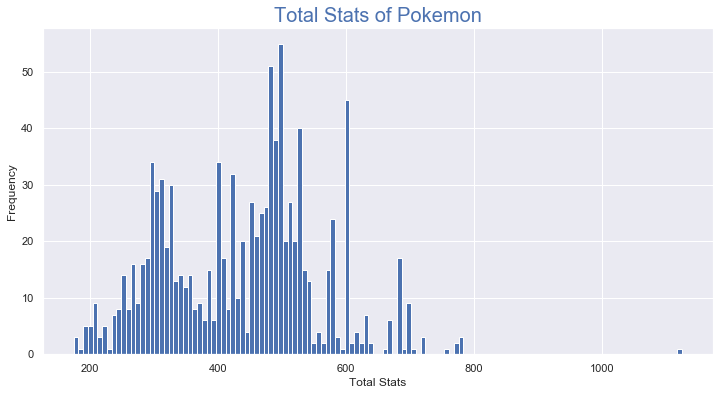

In [141]:
sns.set()
plt.figure(figsize=(12,6))
plt.title("Total Stats of Pokemon", fontsize=20, color= 'b')
plt.xlabel('Total Stats')
plt.ylabel('Frequency')

plt.hist(poke_df['Total'],bins=128)

**20. Plot a Histogram that shows the distribution of frequency of pokemon Hit Points including labels. divede the data in 64 bins.**

(array([  1.,   0.,   2.,   0.,   6.,   0.,   6.,  17.,  18.,  62.,  20.,
         58.,  86.,  50., 104.,  23.,  80.,  95.,  74.,  77.,   9.,  30.,
         51.,  28.,  46.,   5.,  23.,  15.,   5.,   5.,   3.,   6.,   3.,
          2.,   2.,   2.,   1.,   4.,   0.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.]),
 array([  1.     ,   4.96875,   8.9375 ,  12.90625,  16.875  ,  20.84375,
         24.8125 ,  28.78125,  32.75   ,  36.71875,  40.6875 ,  44.65625,
         48.625  ,  52.59375,  56.5625 ,  60.53125,  64.5    ,  68.46875,
         72.4375 ,  76.40625,  80.375  ,  84.34375,  88.3125 ,  92.28125,
         96.25   , 100.21875, 104.1875 , 108.15625, 112.125  , 116.09375,
        120.0625 , 124.03125, 128.     , 131.96875, 135.9375 , 139.90625,
        143.875  , 147.84375, 151.8125 , 155.78125, 159.75   , 163.71875,
        167.6875 , 171.65625, 175.625  , 179.593

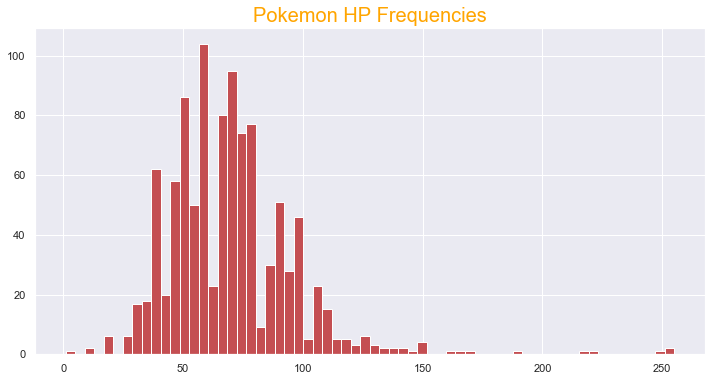

In [142]:
plt.figure(figsize=(12,6))
plt.title("Pokemon HP Frequencies", fontsize=20,color='Orange')
plt.hist(poke_df['HP'],color='r',bins=64)

**21. Plot a bar graph that shows the total number of pokemon with each type 1 (primary) category that exists in the data.**

In [143]:
poke_df.Type_1.value_counts()

Water       134
Normal      115
Grass        91
Bug          81
Psychic      76
Fire         65
Electric     61
Rock         60
Dark         44
Ghost        41
Ground       41
Dragon       40
Poison       39
Fighting     38
Steel        36
Ice          36
Fairy        22
Flying        8
Name: Type_1, dtype: int64

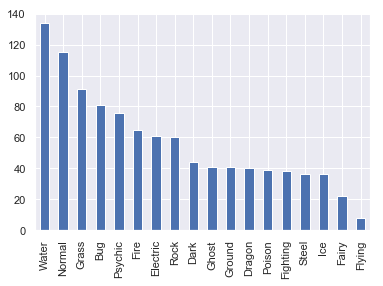

In [144]:
poke_df.Type_1.value_counts().plot.bar()

**19. Refering to the last graph above, We can observe that Ghost, Ground, and Dragon have similar amounts of pokemon. We want to see how their total stats are in comparison to each other.**

Text(0.5,1,'Ground-Dragon-Ghost Total Stats Frequencies')

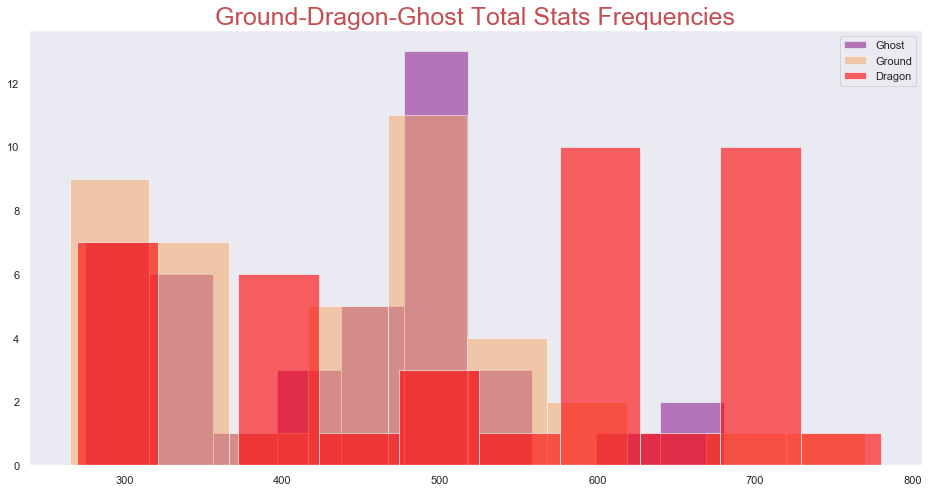

In [145]:
type_ghost = poke_df[poke_df['Type_1'] == 'Ghost']
type_ground = poke_df[poke_df['Type_1'] == 'Ground']
type_dragon = poke_df[poke_df['Type_1'] == 'Dragon']

plt.figure(figsize=(16,8))
plt.grid(False)
plt.hist(type_ghost['Total'], label='Ghost', color = 'purple', alpha=.5)
plt.hist(type_ground['Total'], label='Ground', color = 'sandybrown', alpha=.5)
plt.hist(type_dragon['Total'], label='Dragon', color = 'red', alpha=.6)
plt.legend(loc='upper right')
plt.title("Ground-Dragon-Ghost Total Stats Frequencies", fontsize=25, color='r')

**From this histogram plot we can see the Dragon type_1 holds higher values of total stats than the other two.**

**20. Plot a bar graph that shows the number of pokemon in each PURE type 1 (primary) category that exists in the data.**

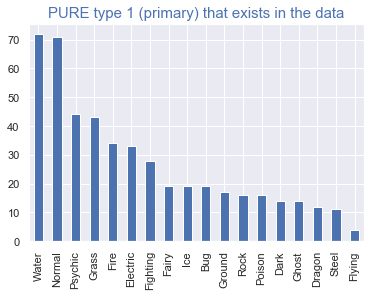

In [146]:
type2_none = poke_df[poke_df['Type_2'] == 'None']
plt.title("PURE type 1 (primary) that exists in the data", fontsize=15, color= 'b')
type2_none.Type_1.value_counts().plot.bar()

**21. Plot a bar graph that shows the total number of pokemon with each type 2 (secondary) category that exists in the data.**

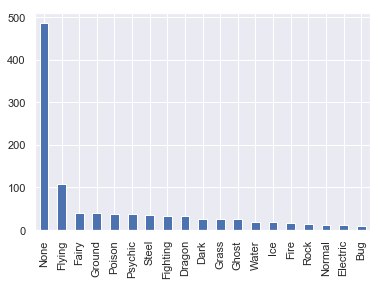

In [147]:
poke_df.Type_2.value_counts().plot.bar()

**22. Plot a bar graph that shows every combination of types possible in the data**

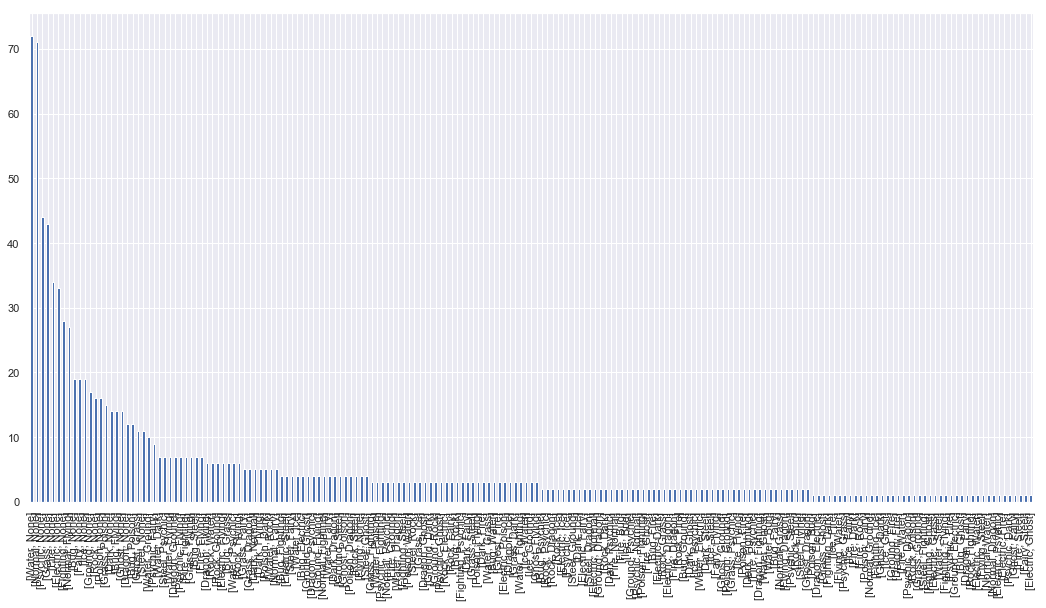

In [148]:
plt.figure(figsize=(18,9))
poke_df.Type.value_counts().plot.bar()

**23. Plot a heatmap to find the Frequency of type combinations using the two categorical data columns type_1 and type_2.**

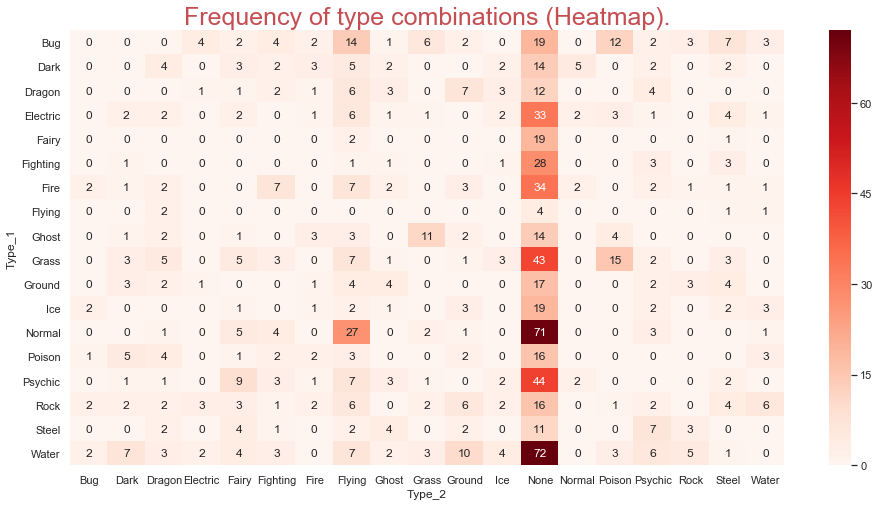

In [177]:
plt.figure(figsize=(16,8))
#flights = poke_df
type_combos = pd.pivot_table(poke_df, 
                         index="Type_1", columns="Type_2", values="Name",
                         aggfunc=lambda x: x.value_counts().count(), fill_value=0)
plt.title("Frequency of type combinations (Heatmap).", fontsize=25, color='r')
sns.heatmap(type_combos,cmap='Reds',annot=True, annot_kws={"size": 12})

**24. Refering to the heatmap above, there appears to be one pokemon whos type is electric/fire. Retirieve the record of<br>
that pokemon.**

In [150]:
poke_df.loc[(poke_df['Type_1'] == "Electric") & (poke_df['Type_2'] == "Fire")]

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
564,479,Rotom Heat Rotom,"[Electric, Fire]",Electric,Fire,50,65,107,105,107,86,520,86


**25. Refering to the heatmap above, there appears to be four pokemon whos are purely flying-types. Retirieve the record of
those pokemon.**

In [151]:
poke_df.loc[(poke_df['Type_1'] == "Flying") & (poke_df['Type_2'] == "None")]

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
740,641,Tornadus Incarnate Forme,"[Flying, None]",Flying,None,79,115,70,125,80,111,580,96
741,641,Tornadus Therian Forme,"[Flying, None]",Flying,None,79,100,80,110,90,121,580,96
951,821,Rookidee,"[Flying, None]",Flying,None,38,47,35,33,35,57,245,40
952,822,Corvisquire,"[Flying, None]",Flying,None,68,67,55,43,55,77,365,60


**26. What are the correlation between all stats?**

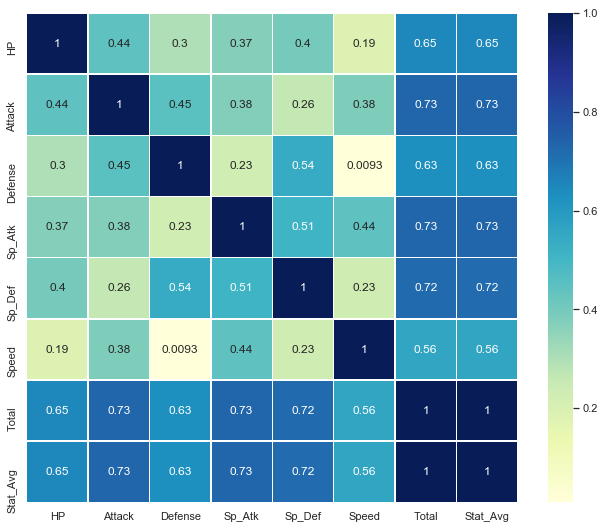

In [152]:
#temp_poke_df = poke_df.drop(["Stat_Avg"], axis = 1)

corrmat = poke_df.corr() 
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corrmat, cmap="YlGnBu",  linewidths=.5,annot=True, annot_kws={"size": 12})

**27. To see what a 1-to-1 correlation looks like, plot "Total" and "Stat Average" columns.**

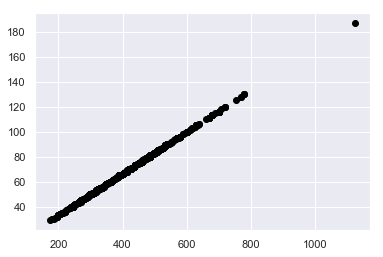

In [153]:
x = poke_df["Total"]
y = poke_df["Stat_Avg"]

plt.plot(x, y, 'o', color='black')

**28. To see what two columns look like at a correlation of 73%, plot 'Total' and 'Sp.Atk' using Seaborn. By default, a linear regression fit is drawn.**

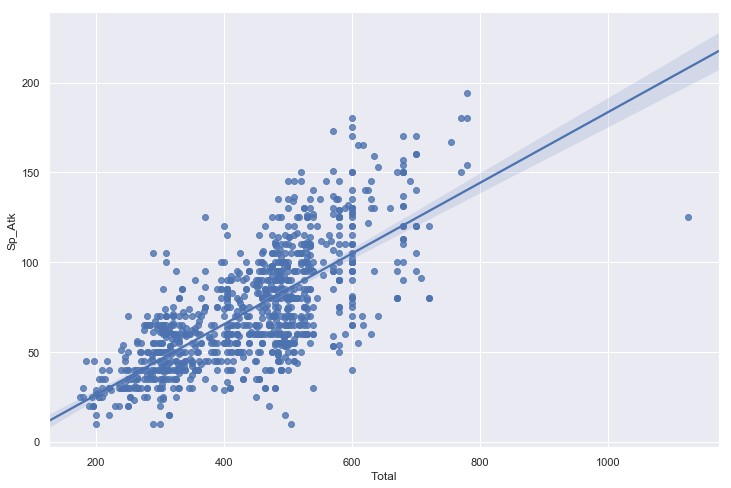

In [154]:
plt.figure(figsize=(12,8))
sns.regplot(x=poke_df["Total"], y=poke_df["Sp_Atk"])

**29. To see a correlation of .9%, plot 'Speed' and 'Defense'.**

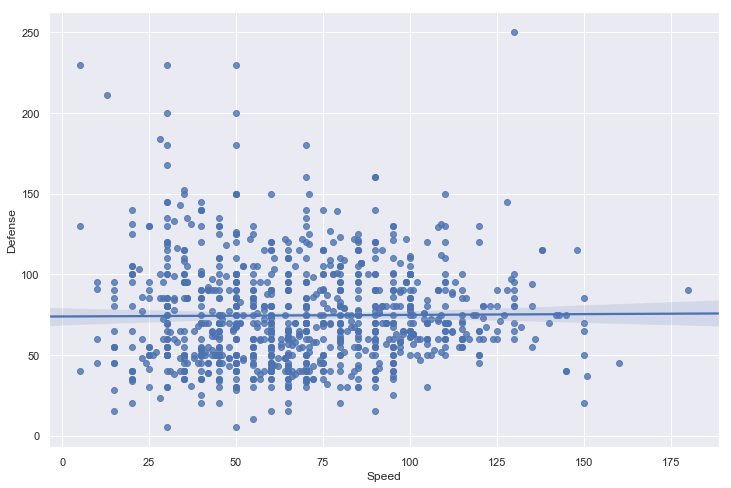

In [155]:
plt.figure(figsize=(12,8))

sns.regplot(x=poke_df["Speed"], y=poke_df["Defense"])

**30. Create function that takes in the name one numeric stat column and returns the average of each type of pokemon.**

In [157]:
def AverageByCol(column):
    type_fire = poke_df[poke_df['Type_1'] == 'Fire']
    type_water = poke_df[poke_df['Type_1'] == 'Water']
    type_electric = poke_df[poke_df['Type_1'] == 'Electric']
    type_grass = poke_df[poke_df['Type_1'] == 'Grass']

    type_ghost = poke_df[poke_df['Type_1'] == 'Ghost']
    type_fighting = poke_df[poke_df['Type_1'] == 'Fighting']
    type_rock = poke_df[poke_df['Type_1'] == 'Rock']
    type_dark = poke_df[poke_df['Type_1'] == 'Dark']

    type_normal = poke_df[poke_df['Type_1'] == 'Normal']
    type_fairy = poke_df[poke_df['Type_1'] == 'Fairy']
    type_psychic = poke_df[poke_df['Type_1'] == 'Psychic']
    type_steel = poke_df[poke_df['Type_1'] == 'Steel']
    type_dragon = poke_df[poke_df['Type_1'] == 'Dragon']
    
    
    AVG_type_fire = type_fire[column].mean()
    AVG_type_water = type_water[column].mean()
    AVG_type_electric = type_electric[column].mean()
    AVG_type_grass = type_grass[column].mean()

    AVG_type_ghost = type_ghost[column].mean()
    AVG_type_fighting = type_fighting[column].mean()
    AVG_type_rock = type_rock[column].mean()
    AVG_type_dark = type_dark[column].mean()

    AVG_type_normal = type_normal[column].mean()
    AVG_type_fairy = type_fairy[column].mean()
    AVG_type_psychic = type_psychic[column].mean()
    AVG_type_steel = type_psychic[column].mean()
    AVG_type_dragon = type_psychic[column].mean() 
    
    AVG_df = pd.DataFrame({'Types': ['Fire',"Water", "Electric","Grass",
                                   "Ghost","Fighting","Rock","Dark",
                                   "Normal","Fairy","Psychic","Steel","Dragon"],
                          'Averages':[ AVG_type_fire,AVG_type_water,AVG_type_electric,AVG_type_grass,
                                        AVG_type_ghost,AVG_type_fighting,AVG_type_rock,AVG_type_dark,
                                        AVG_type_normal,AVG_type_fairy,AVG_type_psychic,AVG_type_steel,AVG_type_dragon ] 
                         })
    
    return AVG_df.sort_values(by="Averages",ascending=False);

**31. Using the function above, find the averate Hit Points for each type and then graph it.**

In [158]:
AverageByCol(column = "HP")

,Averages,Types
8,77.052174,Normal
9,72.954545,Fairy
10,71.973684,Psychic
11,71.973684,Steel
12,71.973684,Dragon
5,71.394737,Fighting
1,70.888060,Water
0,69.430769,Fire
7,68.818182,Dark
6,67.100000,Rock


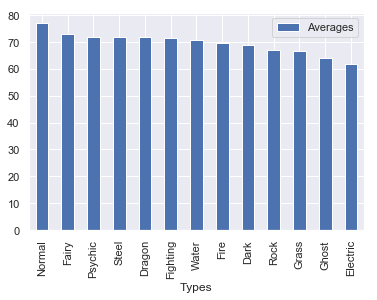

In [159]:
AverageByCol(column = "HP").plot(kind='bar',x='Types',y='Averages')

**32. Using the function above, find the averate Attack for each type and then graph it.**

In [160]:
AverageByCol(column = "Attack")

,Averages,Types
5,101.263158,Fighting
6,91.783333,Rock
0,85.400000,Fire
7,81.000000,Dark
8,75.260870,Normal
1,74.992537,Water
10,74.934211,Psychic
11,74.934211,Steel
12,74.934211,Dragon
3,74.813187,Grass


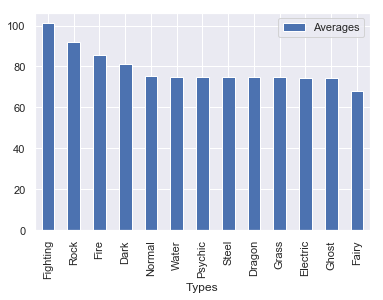

In [161]:
AverageByCol(column = "Attack").plot(kind='bar',x='Types',y='Averages')

**33. Using the function above, find the average speed for each type and then graph it.**

In [162]:
AverageByCol(column = "Speed")

,Averages,Types
2,84.901639,Electric
10,80.592105,Psychic
11,80.592105,Steel
12,80.592105,Dragon
7,75.750000,Dark
0,74.369231,Fire
8,69.678261,Normal
5,69.210526,Fighting
1,66.335821,Water
4,61.414634,Ghost


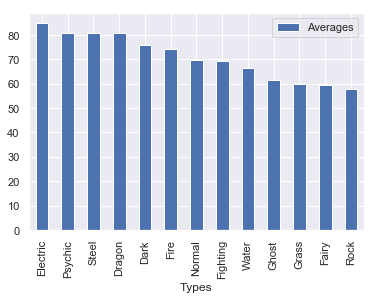

In [178]:
AverageByCol(column = "Speed").plot(kind='bar',x='Types',y='Averages')

**34. Using the function above, find the average special defense for each type and then graph it.**

In [163]:
AverageByCol(column = "Sp_Def")

,Averages,Types
9,89.181818,Fairy
10,87.723684,Psychic
11,87.723684,Steel
12,87.723684,Dragon
4,78.780488,Ghost
6,72.800000,Rock
2,72.016393,Electric
1,71.395522,Water
0,71.292308,Fire
3,70.054945,Grass


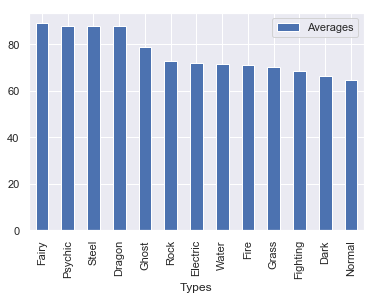

In [164]:
AverageByCol(column = "Sp_Def").plot(kind='bar',x='Types',y='Averages')

**35. Using the function above, find the average stat totals for each type and then graph it.**

In [165]:
AverageByCol(column = "Total")

,Averages,Types
10,485.315789,Psychic
11,485.315789,Steel
12,485.315789,Dragon
0,455.015385,Fire
2,449.327869,Electric
6,448.683333,Rock
4,440.756098,Ghost
9,439.272727,Fairy
5,439.052632,Fighting
1,431.738806,Water


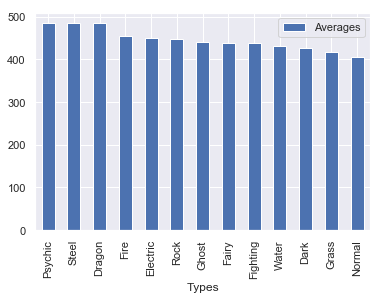

In [166]:
AverageByCol(column = "Total").plot(kind='bar',x='Types',y='Averages')

**36. Using the function above, find the average stat average for each type and then graph it.**

In [167]:
AverageByCol(column = "Stat_Avg")

,Averages,Types
10,80.526316,Psychic
11,80.526316,Steel
12,80.526316,Dragon
0,75.446154,Fire
2,74.426230,Electric
6,74.416667,Rock
4,73.024390,Ghost
9,72.772727,Fairy
5,72.736842,Fighting
1,71.582090,Water


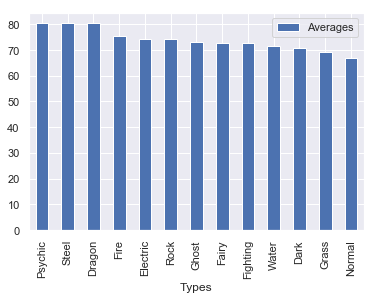

In [168]:
AverageByCol(column = "Stat_Avg").plot(kind='bar',x='Types',y='Averages')

**37. Create function that takes in the name of a type (type_1 primary) and returns the average stats of pokemon of that type.**

In [179]:
def AverageOfType1(type1):
    
    typeFiltered_poke_df = poke_df.loc[(poke_df['Type_1'] == type1)]
                         
    AVG_HP = typeFiltered_poke_df["HP"].mean()
    AVG_Attack = typeFiltered_poke_df["Attack"].mean()
    AVG_Defense = typeFiltered_poke_df["Defense"].mean()
    AVG_Sp_Atk = typeFiltered_poke_df["Sp_Atk"].mean()
    AVG_Sp_Def = typeFiltered_poke_df["Sp_Def"].mean()
    AVG_Speed = typeFiltered_poke_df["Speed"].mean()
    AVG_Total = typeFiltered_poke_df["Total"].mean()
    AVG_Stat_Avg = typeFiltered_poke_df["Stat_Avg"].mean()
                                       
    TypeAVG_df = pd.DataFrame({'Type':[type1],
                               'AVG_HP':[AVG_HP],
                               'AVG_Attack':[AVG_Attack], 
                               'AVG_Defense':[AVG_Defense], 
                               'AVG_Sp_Atk':[AVG_Sp_Atk], 
                               'AVG_Sp_Def':[AVG_Sp_Def], 
                               'AVG_Speed':[AVG_Speed], 
                               'AVG_Total':[AVG_Total], 
                               'AVG_Stat_Avg':[AVG_Stat_Avg],
                              })
    
    TypeAVG_df = TypeAVG_df [['Type','AVG_HP','AVG_Attack','AVG_Defense','AVG_Sp_Atk','AVG_Sp_Def','AVG_Speed','AVG_Total','AVG_Stat_Avg']];
    return TypeAVG_df

**38. Using the function above, find the average stat of a specific type.**

In [170]:
AverageOfType1(type1 = "Fire")

,Type,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Fire,69.430769,85.4,68.107692,86.415385,71.292308,74.369231,455.015385,75.446154


In [171]:
AverageOfType1(type1 = "Water")

,Type,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Water,70.88806,74.992537,73.119403,75.007463,71.395522,66.335821,431.738806,71.58209


In [172]:
AverageOfType1(type1 = "Grass")

,Type,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Grass,66.736264,74.813187,71.824176,75.043956,70.054945,59.769231,418.241758,69.307692


In [173]:
AverageOfType1(type1 = "Dragon")

,Type,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Dragon,82.375,107.2,84.775,91.525,84.95,84.45,535.275,89.0


**38. Create a bar graph that compares the average defense of fire, water, electric, grass, and dragon types.**

Text(0.5,1,'average defense of all fire, water, electric, grass, and dragon types.')

<Figure size 864x576 with 0 Axes>

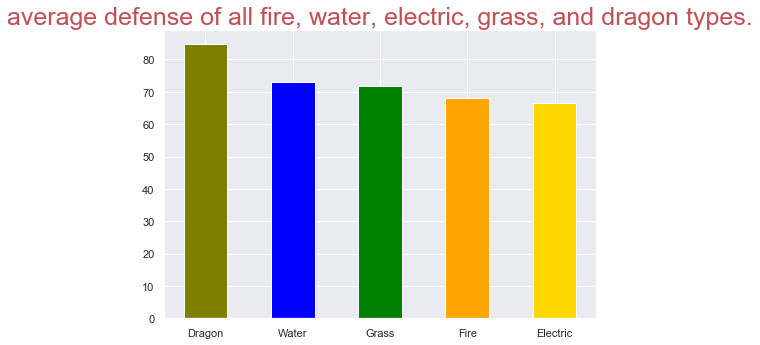

In [183]:
fireAvg = AverageOfType1(type1 = "Fire").AVG_Defense
waterAvg = AverageOfType1(type1 = "Water").AVG_Defense
grassAvg = AverageOfType1(type1 = "Grass").AVG_Defense
electricAvg = AverageOfType1(type1 = "Electric").AVG_Defense
dragonAvg = AverageOfType1(type1 = "Dragon").AVG_Defense

plt.figure(figsize=(12,8))

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])

ax.bar("Dragon", dragonAvg, color = 'olive', width = 0.5)
ax.bar("Water", waterAvg, color = 'blue', width = 0.5)
ax.bar("Grass", grassAvg, color = 'green', width = 0.5)
ax.bar("Fire", fireAvg, color = 'orange', width = 0.5)
ax.bar("Electric", electricAvg, color = 'gold', width = 0.5)
plt.title("average defense of all fire, water, electric, grass, and dragon types.", fontsize=25, color='r')

**39. Create function that takes in the name of one or both yupes and returns the average stats of pokemon of that/those types. (The default of type 2 is "None")**


In [ ]:
def AverageOfType1And2(type1, type2="None"):
    
    typeFiltered_poke_df = poke_df.loc[(poke_df['Type_1'] == type1) & (poke_df['Type_2'] == type2)]
                         
    AVG_HP = typeFiltered_poke_df["HP"].mean()
    AVG_Attack = typeFiltered_poke_df["Attack"].mean()
    AVG_Defense = typeFiltered_poke_df["Defense"].mean()
    AVG_Sp_Atk = typeFiltered_poke_df["Sp_Atk"].mean()
    AVG_Sp_Def = typeFiltered_poke_df["Sp_Def"].mean()
    AVG_Speed = typeFiltered_poke_df["Speed"].mean()
    AVG_Total = typeFiltered_poke_df["Total"].mean()
    AVG_Stat_Avg = typeFiltered_poke_df["Stat_Avg"].mean()
                                       
    TypeAVG_df = pd.DataFrame({'Type_1':[type1],
                               'Type_2':[type2],
                               'AVG_HP':[AVG_HP],
                               'AVG_Attack':[AVG_Attack], 
                               'AVG_Defense':[AVG_Defense], 
                               'AVG_Sp_Atk':[AVG_Sp_Atk], 
                               'AVG_Sp_Def':[AVG_Sp_Def], 
                               'AVG_Speed':[AVG_Speed], 
                               'AVG_Total':[AVG_Total], 
                               'AVG_Stat_Avg':[AVG_Stat_Avg],
                              })
    
    TypeAVG_df = TypeAVG_df [['Type_1','Type_2','AVG_HP','AVG_Attack','AVG_Defense','AVG_Sp_Atk','AVG_Sp_Def','AVG_Speed','AVG_Total','AVG_Stat_Avg']];
    return TypeAVG_df

In [185]:
AverageOfType1And2(type1 = "Fire")

,Type_1,Type_2,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Fire,None,62.676471,79.088235,57.941176,72.529412,63.705882,74.705882,410.647059,68.058824


In [186]:
AverageOfType1And2("Fire","Ground")

,Type_1,Type_2,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Fire,Ground,66.666667,93.333333,70.0,105.0,75.0,31.666667,441.666667,73.0


**TODO:
1. percentages of pokemon with grass/fire/water as primary vs secondary
2. Compare a specific pokemon stats with its type averages
3. function accepts a types and ouptus a list of all its secondary combinations
4. total # of pokemon of the type found in AverageOfType1 function return.
5. Createa all in one functions.
6. Function that returns top 5-10 percent of a specific types collumn.
7. Add styling/titles to other graphs**